In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from load import local_SA, load_SA

In [3]:
data_more = load_SA("more_data.pkl")
data_less = load_SA("local_SA_data_speed2.pkl")["speed2"][2][1]

In [4]:
print(data_more, "\n")
print(data_less, "\n")

{'mean_interactions': [24.12807881773399, 24.385245901639344, 24.0, 25.69808306709265, 24.57443365695793, 22.525790349417637, 25.576329331046313, 28.463108320251177, 25.233390119250426, 27.71656050955414], 'mean_time_steps': [153.5878489326765, 160.99344262295082, 164.40344827586208, 164.21725239616615, 157.37540453074433, 152.67054908485858, 174.97084048027443, 170.72684458398743, 166.96592844974447, 168.09872611464968], 'mean_distance': [240.4105090311987, 239.00983606557378, 248.94137931034481, 243.93929712460064, 237.2766990291262, 229.4875207986689, 256.4271012006861, 246.2558869701727, 244.98977853492335, 245.77388535031847]} 

{'mean_interactions': [29.488536155202823, 32.2418524871355, 30.15156507413509, 31.421404682274247, 37.0188679245283, 29.07207207207207, 37.097133757961785, 31.5712, 35.614664586583466, 30.82716049382716], 'mean_time_steps': [191.53086419753086, 192.02229845626073, 181.40691927512356, 194.9314381270903, 206.1933962264151, 196.23963963963965, 206.4474522292

avg arrival, interactions, distance


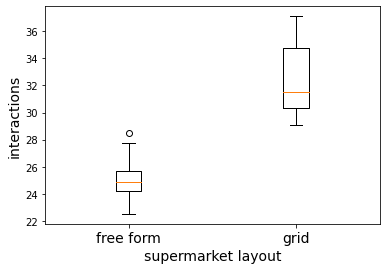

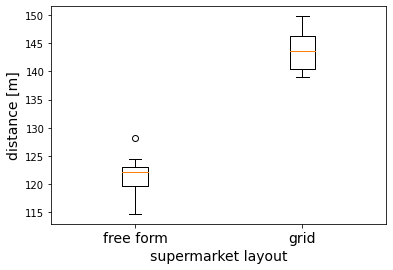

In [7]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
# data = data_avg_arrival["avg_arrival"]
print("avg arrival, interactions, distance")

# more
interactions, time_steps, distance = [data_more["mean_interactions"]][0], [data_more["mean_time_steps"]][0], [data_more["mean_distance"]][0]
boxplot_interactions = [interactions]
boxplot_distance = [0.5*np.array(distance)]

# less
interactions, time_steps, distance = [data_less["mean_interactions"]][0], [data_less["mean_time_steps"]][0], [data_less["mean_distance"]][0]
boxplot_interactions.append(interactions)
boxplot_distance.append(0.5*np.array(distance))

ax1.boxplot(boxplot_interactions)
ax2.boxplot(boxplot_distance)
ax1.set_ylabel("interactions", fontsize=14)
ax1.set_xlabel("supermarket layout", fontsize=14)
ax2.set_ylabel("distance [m]", fontsize=14)
ax2.set_xlabel("supermarket layout", fontsize=14)

# ax1.set_xticks(np.arange(-0.5, 2, 0.5))
ax1.set_xticklabels(["free form", "grid"], fontsize=14)
# ax2.set_xticks(np.arange(-1, 3, 1))
ax2.set_xticklabels(["free form", "grid"], fontsize=14)

# ax1.set_xticks(np.arange(-0.5, 2, 0.5))
# ax1.set_xticklabels(["", "free form", "", "grid", ""], fontsize=12)
# ax2.set_xticks(np.arange(-1, 3, 1))
# ax2.set_xticklabels(["", "free form", "grid", ""], fontsize=12)

fig1.savefig("figs/results_interactions", dpi=300, bbox_inches="tight")
fig2.savefig("figs/results_distance", dpi=300, bbox_inches="tight")

In [24]:
def welch_dof(x,y):
        dof = (np.var(x)/len(x) + np.var(y)/len(y))**2 / ((np.var(x)/len(x))**2 / (len(x)-1) + (np.var(y)/len(y))**2 / (len(y)-1))
        print(f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")
        
interactions_ttest = stats.ttest_ind(boxplot_interactions[0], boxplot_interactions[1])
distance_ttest = stats.ttest_ind(boxplot_distance[0], boxplot_distance[1])
print("welch (14) interactions ttest free form on grid:")
print(interactions_ttest, "\n")
welch_dof(boxplot_interactions[0], boxplot_interactions[1])
print("welch (17) distance ttest free form on grid:")
print(distance_ttest)
welch_dof(boxplot_distance[0], boxplot_distance[1])

welch (14) interactions ttest free form on grid:
Ttest_indResult(statistic=-6.51288052914386, pvalue=4.010989482247593e-06) 

Welch-Satterthwaite Degrees of Freedom= 14.5049
welch (17) distance ttest free form on grid:
Ttest_indResult(statistic=-13.259969682681211, pvalue=9.953353491568054e-11)
Welch-Satterthwaite Degrees of Freedom= 17.9278
